In [ ]:
# -*- coding: utf-8 -*-

#GRAFICOS PARA SERIES TEMPORALES

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns 
import datetime
import time
df = pd.read_csv(r"C:\Users\user\Documents\PYTHON\Python data science y big data\Datos\Indicators_of_Health_Insurance_Coverage.csv",nrows=1000000)
df2 = df[df['Group'].isin(['By Age','By Sex'])]
df = df.head(500000)

In [2]:
df

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range,Suppression Flag
0,Uninsured at the Time of Interview,National Estimate,United States,United States,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,12.6,12.1,13.3,12.1 - 13.3,NaN,NaN
1,Uninsured at the Time of Interview,By Age,United States,18 - 24 years,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,17.7,14.2,21.6,14.2 - 21.6,NaN,NaN
2,Uninsured at the Time of Interview,By Age,United States,25 - 34 years,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,16.8,15.6,18.1,15.6 - 18.1,NaN,NaN
3,Uninsured at the Time of Interview,By Age,United States,35 - 44 years,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,12.1,10.7,13.6,10.7 - 13.6,NaN,NaN
4,Uninsured at the Time of Interview,By Age,United States,45 - 64 years,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,9.5,8.8,10.2,8.8 - 10.2,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7762,Private Health Insurance Coverage,By State,Virginia,Virginia,3.2,37,"Sep 1 - Sep 13, 2021",09/01/2021,09/13/2021,83.0,78.4,87.0,78.4 - 87.0,81.6-89.4,NaN
7763,Private Health Insurance Coverage,By State,Washington,Washington,3.2,37,"Sep 1 - Sep 13, 2021",09/01/2021,09/13/2021,77.4,73.8,80.8,73.8 - 80.8,73.0-78.9,NaN
7764,Private Health Insurance Coverage,By State,West Virginia,West Virginia,3.2,37,"Sep 1 - Sep 13, 2021",09/01/2021,09/13/2021,73.6,64.1,81.8,64.1 - 81.8,73.0-78.9,NaN
7765,Private Health Insurance Coverage,By State,Wisconsin,Wisconsin,3.2,37,"Sep 1 - Sep 13, 2021",09/01/2021,09/13/2021,85.5,81.0,89.2,81.0 - 89.2,81.6-89.4,NaN


In [61]:
times = []
for i in np.arange(len(df)):
    #times.append(datetime.datetime(year = df.loc[i,'Year'], month = df.loc[i,'Month'], day = df.loc[i,'Day']))
    #Si tenemos separados en diferentes columnas el año, el mes y el dia y lo queremos unir en formato fechdfa
    times.append(datetime.datetime.strptime(df.loc[i,'Time Period Start Date'], '%m/%d/%Y'))
#Aqui ya tenemos la fecha completa pero esta como str y necesitamos que quede en formato fecha

In [62]:
times[4]
#Muestra la fecha para la fila 5000 de

datetime.datetime(2020, 4, 23, 0, 0)

In [63]:
df['Time'] = times

In [64]:
data = df.groupby(by=['Time'],as_index =False)[['Low CI', 'Value']].mean()
data.head()
#as_index hace que Time sea una columna aparte y no solo el indice de las filas
#La media de Low CI y de Value para esa fecha es lo que sale en las columnas
#data = df.groupby(by=['Time'],as_index =False)['Low CI','Value'].mean()

,Time,Low CI,Value
0,2020-04-23,33.276617,36.768159
1,2020-05-07,33.148168,38.305759
2,2020-05-14,33.181407,37.136683
3,2020-05-21,33.813636,37.427778
4,2020-05-28,33.506468,36.965174


<AxesSubplot:xlabel='Time', ylabel='Value'>

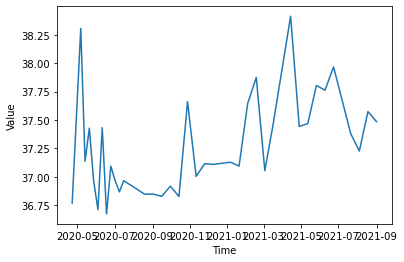

In [65]:
#sns.lineplot(data['Time'],data['Value'])
#Grafico de linea de los datos de la columna Value, contra la fecha --> seguimiento de indicador en el tiempo
sns.lineplot(x = data['Time'], y=data['Value'])

<AxesSubplot:>

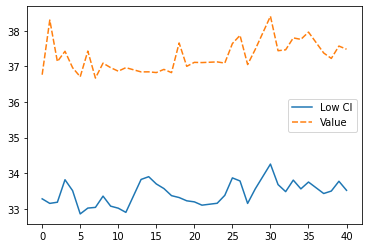

In [71]:
sns.lineplot(data=data)